In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## Make them supervised

In [2]:
from sklearn.datasets import fetch_olivetti_faces
dataset = fetch_olivetti_faces(shuffle=True, random_state=0)
faces = dataset.data
faces.shape

downloading Olivetti faces from http://cs.nyu.edu/~roweis/data/olivettifaces.mat to C:\Users\Kunal\scikit_learn_data


(400, 4096)

In [5]:
def plot_images(data):
    fig, axes = plt.subplots(3, 4, subplot_kw={'xticks': (), 'yticks': ()})
    for i, ax in enumerate(axes.ravel()):
        ax.imshow(data[i].reshape(64,64), cmap="gray")

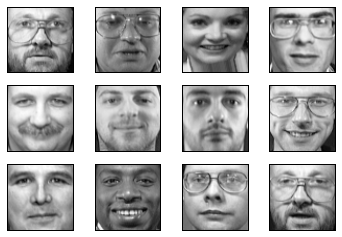

In [6]:
plot_images(faces)

(12, 4096)


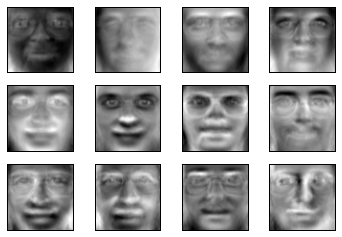

In [7]:
from sklearn.decomposition import RandomizedPCA
pca = RandomizedPCA(n_components=12).fit(faces)
print(pca.components_.shape)
plot_images(pca.components_)

(12, 4096)


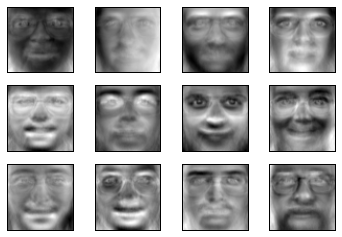

In [8]:
from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components=12).fit(faces)
print(fa.components_.shape)
plot_images(fa.components_)

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

fa_pipe = make_pipeline(FactorAnalysis(n_components=12), LogisticRegression())
pca_pipe = make_pipeline(RandomizedPCA(n_components=12), LogisticRegression())

In [10]:
from sklearn.cross_validation import cross_val_score

fa_scores = cross_val_score(fa_pipe, faces, dataset.target, cv=5)
pca_scores = cross_val_score(pca_pipe, faces, dataset.target, cv=5)

In [13]:
print("Factor analysis scores: %f PCA scores: %f" % (np.mean(fa_scores),np.mean(pca_scores)))

Factor analysis scores: 0.862500 PCA scores: 0.837500


## Use validation data likelihood (or density) for probabilistic models

## Use structural properties in Clustering

## Visualize, inspect, validate

## To cross-validate or no to cross-validate